# First End to End ML Project - California House Pricing

This project follows along with [Hands-On Machine Learning with Scikit-Learn & TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291) by Aurélien Géron. It is a full walkthrough of how to create a machine learning project, and how to understand the basic workflow.

In [1]:
# Import packages
import sklearn as sci
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
# Import dataset
import os
import tarfile
from six.moves import urllib

download_root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
housing_path = os.path.join("datasets","housing")
housing_url = download_root + "datasets/housing/housing.tgz"

In [4]:
# Function for fetching data
def fetch_housing(housing_url= housing_url, housing_path=housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing()

In [5]:
# Function to load data
def load_housing_data(housing_path=housing_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
df = load_housing_data()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# List of column names
for col in df.columns:
    print(col)

longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value
ocean_proximity


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We can see that *ocean_proximity* is the only non float column, so let's see what it contains.

In [10]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## EDA for Data Cleaning and Understanding

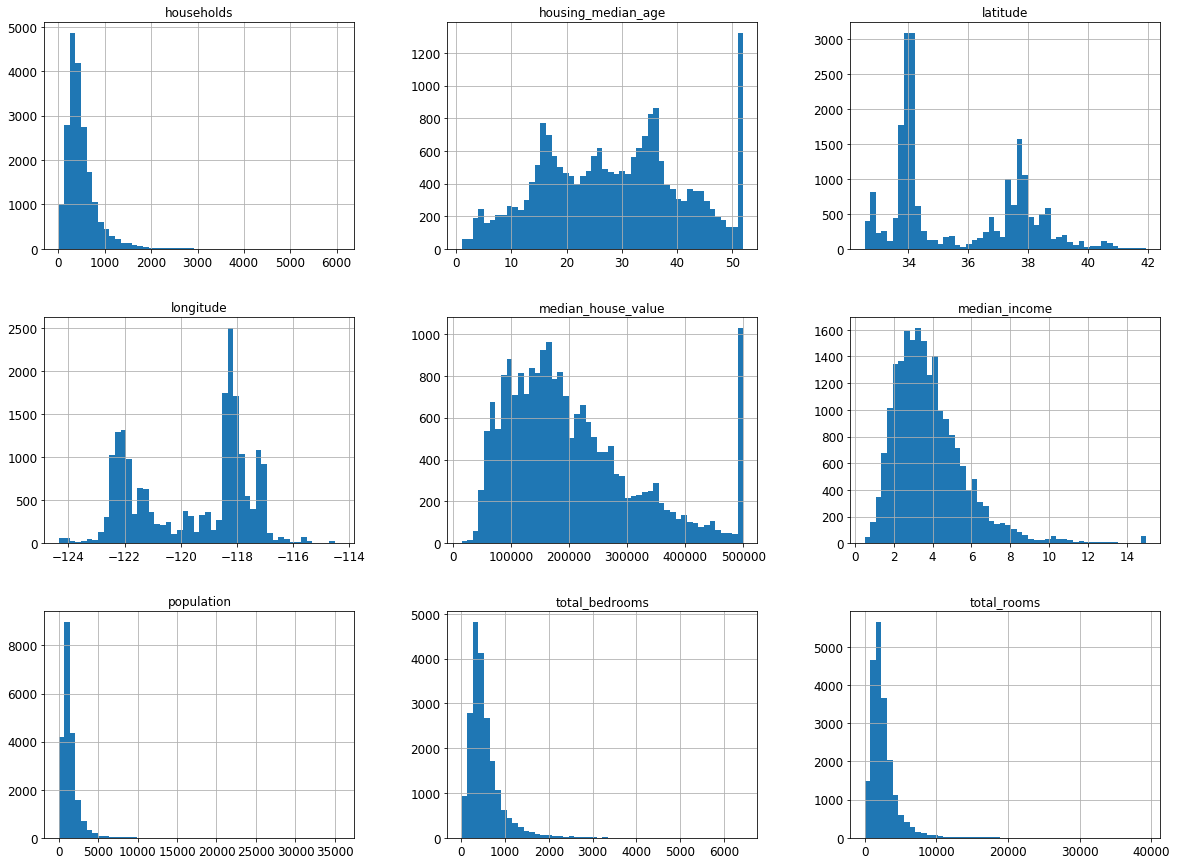

In [11]:
df.hist(bins=50,figsize=(20,15))
plt.show()

Based upon our histograms we can see that we have some data points on the upper end of *house_median_age* and *median_house_value*, as points above a threshold were considered at a maximum of 52 years and $500,001, respectively.

We can also see that *median_income* is on scale from 0-15. This should not effect our analysis, but it is worth noting going forward.

Most of all, these histograms show that the data is not normally distributed, and perhaps we will need to perform some transformations to get normally distributed data for our models.

## Create Test Set

In [12]:
# Import scikitlearn train_test_split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state = 10)

In [13]:
print("Train size: {0}, Test size: {1}".format(train.shape[0],test.shape[0]))

Train size: 16512, Test size: 4128


Now we have successfully randomized our choice of training and test data with $20$**%** of the data being test data.

## Sample by Median Income 

We want to make sure that there is not a significant difference between both our test and train data when it comes to our median income. This is one of our main categories and it'd be ideal if our

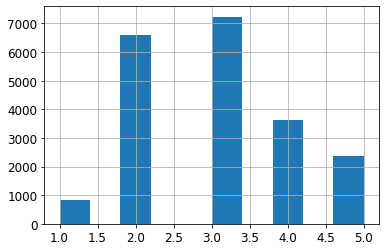

In [14]:
df["income_cat"] = np.ceil(df["median_income"] / 1.5)
df["income_cat"].where(df["income_cat"] < 5 , 5.0, inplace=True)
df["income_cat"].hist()
plt.show()

In [15]:
# Separate in proportion to income_cat
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state=10)
for train_i, test_i in split.split(df,df["income_cat"]):
    strat_train_set = df.loc[train_i]
    strat_test_set = df.loc[test_i]

In [16]:
strat_test_set["income_cat"].value_counts() / strat_test_set.shape[0]

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

We can see that by using the *StratifiedShuffleSplit* function, that our data is sampled by proportion of *income_cat* to our original dataset. This will help us eliminate any selection bias to our data.

Now lets remove the *income_cat* column from our new *strat_train_set* and *strat_test_set*.

In [17]:
# Drop income_cat from datasets
strat_train_set = strat_train_set.drop(["income_cat"],axis=1)
strat_test_set = strat_test_set.drop(["income_cat"],axis=1)

## Create Copy for EDA of Training Set

In [18]:
# Copy training set
housing = strat_train_set.copy()

In [19]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13860,-117.26,34.48,6.0,4632.0,753.0,1851.0,694.0,4.1933,163100.0,INLAND
18923,-122.16,38.07,14.0,6360.0,1236.0,2876.0,1127.0,4.5321,190300.0,NEAR BAY
12925,-121.30,38.66,21.0,3824.0,634.0,1818.0,600.0,3.7120,139000.0,INLAND
13525,-117.29,34.17,35.0,4174.0,847.0,2127.0,778.0,3.2232,88300.0,INLAND
5027,-118.34,33.99,46.0,1217.0,322.0,662.0,305.0,3.1731,140300.0,<1H OCEAN


### Geographical Understanding

Lets look at our data points locations to get a better understanding of how this data is being represented from a geographical perspective.

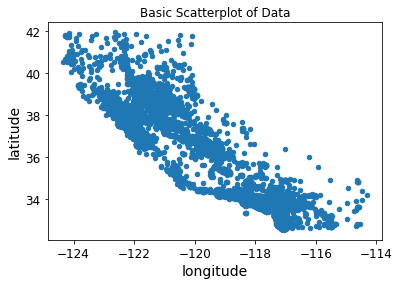

In [20]:
housing.plot(kind = "scatter", x="longitude", y="latitude",title="Basic Scatterplot of Data")
plt.show()

Can confirm, this looks like the shape of California.

Let's see if we can better visualize the density of our points.

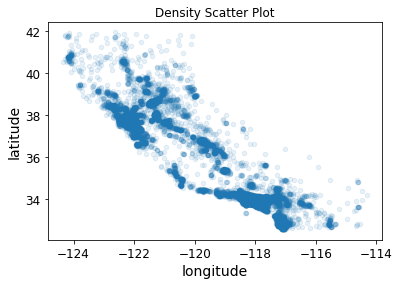

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, title="Density Scatter Plot")
plt.show()

We can see a higher density of datapoints along the coastline. Now let's spice it up even more and give it some more color and information for visualization.

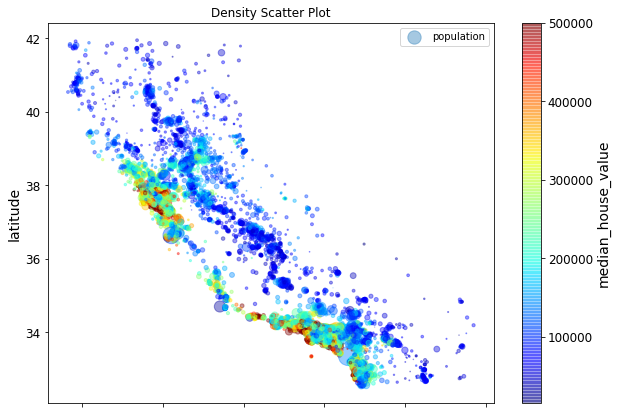

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude",title="Density Scatter Plot", alpha=0.4, s=housing["population"] / 100, label ="population", figsize=(10,7), c="median_house_value", cmap =plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()

We can see that prices are very related to the relative location. Thus it may be in our best interests to create a clustering algorithm to detect our main clusters, then we may add other features that measure the proximity to the cluster centers. Ocean proximity might be a factor to consider as well. However, as we can see on the North end, there is not that same trend where oceanfront has high price.

### Correllation Matrix

In [23]:
corr = housing.corr()
print(corr["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688143
total_rooms           0.133556
housing_median_age    0.105207
households            0.064821
total_bedrooms        0.047816
population           -0.025445
longitude            -0.047029
latitude             -0.142767
Name: median_house_value, dtype: float64


We can see we have a strong correllation between house value and income. There is some slight downwards trend between value and latitude, as we previously mentioned that the decreasing latitude has increased house value (roughly).

### Scatter Matrix

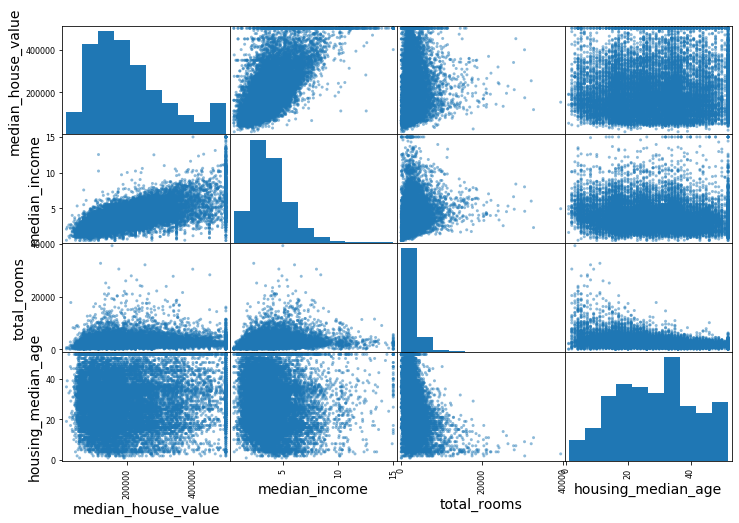

In [24]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize = (12,8))
plt.show()

We can see that we have a solid trend with house value and median income. Lets look at it separately.

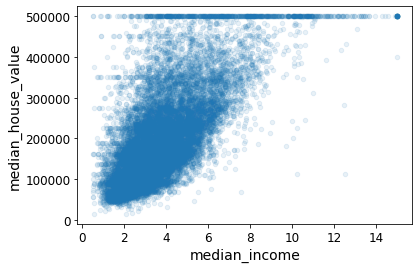

In [25]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)
plt.show()

In [26]:
sqrt_house_value = housing["median_house_value"].to_numpy()**0.5
sqrt_house_value
sqrt_median_income = housing["median_income"].to_numpy()**0.5

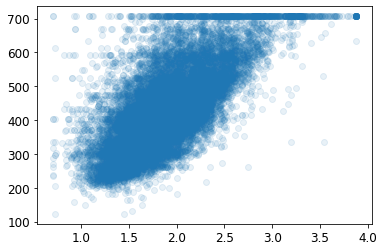

In [27]:
plt.scatter(sqrt_median_income, sqrt_house_value, alpha=0.1)

If we perform regression, it might be worth considering a form of transformation to stabilize our variance of the data, and possibly improve our predictability of the model. 


### Feature Engineering

Perhaps if we modify some of our features, we might get new insights to how we should go about this problem.

In [28]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [29]:
corr = housing.corr()
corr["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688143
rooms_per_household         0.150736
total_rooms                 0.133556
housing_median_age          0.105207
households                  0.064821
total_bedrooms              0.047816
population                 -0.025445
population_per_household   -0.033157
longitude                  -0.047029
latitude                   -0.142767
bedrooms_per_room          -0.254334
Name: median_house_value, dtype: float64

Interestingly enough, some of our transformations actually improved our correlations. Rooms per household slightly improved the correllation as well as bedrooms per room improving in correllation.

## Data Cleaning

Now we will prepare to implement our algorithms. First we have to separate out our predictors and labels we don't want to apply the same transformations to the predictors and the target values.

In [30]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [31]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16351.000000,16512.000000,16512.000000,16512.000000
mean,-119.578644,35.641080,28.693617,2631.300509,536.675433,1420.896076,498.279978,3.866339
std,2.011178,2.141756,12.600775,2173.696583,418.613322,1132.929312,379.573311,1.894839
min,-124.350000,32.540000,1.000000,2.000000,1.000000,5.000000,1.000000,0.499900
25%,-121.810000,33.930000,18.000000,1449.000000,296.000000,788.000000,280.000000,2.562500
50%,-118.510000,34.260000,29.000000,2129.000000,435.000000,1163.500000,410.000000,3.532450
75%,-118.000000,37.720000,37.000000,3142.000000,647.000000,1723.000000,602.000000,4.738600
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


*total_bedrooms* is missing a couple values. So to adjust for this, I will just utilize an imputer later on to give values to nonexisting data points.

### Handling Categorical Attributes

In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13860 to 5444
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16351 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


*ocean_proximity* is a categorical columns. It would be easier for us to transfer this into a numerical column when we run our algorithms.

In [33]:
housing_cat = housing["ocean_proximity"]
housing_cat.head()

13860       INLAND
18923     NEAR BAY
12925       INLAND
13525       INLAND
5027     <1H OCEAN
Name: ocean_proximity, dtype: object

### Form Pipelines

First lets encode our data

In [34]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [35]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(np.array(housing_cat).reshape(-1,1))
housing_cat_encoded[:10]

array([[1.],
       [3.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [0.]])

In [36]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Alternatively we can preprocess using this function.

In [38]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [39]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
13860,-117.26,34.48,6,4632,753,1851,694,4.1933,INLAND,6.67435,2.66715
18923,-122.16,38.07,14,6360,1236,2876,1127,4.5321,NEAR BAY,5.6433,2.55191
12925,-121.3,38.66,21,3824,634,1818,600,3.712,INLAND,6.37333,3.03
13525,-117.29,34.17,35,4174,847,2127,778,3.2232,INLAND,5.36504,2.73393
5027,-118.34,33.99,46,1217,322,662,305,3.1731,<1H OCEAN,3.99016,2.17049


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

housing_num = housing.drop('ocean_proximity', axis=1)

imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index=housing.index)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

Now we have begun building our pipeline.

In [41]:
try:
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [42]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)])

housing_prepared = full_pipeline.fit_transform(housing)

In [43]:
housing_prepared

array([[ 1.15291322, -0.54213219, -1.8010244 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28354307,  1.13411308, -1.16612361, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85592012,  1.40959628, -0.61058542, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.69545612, -0.7569157 ,  0.57985356, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59103657, -0.74757729,  0.97666655, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57114713, -0.76625411,  0.10367797, ...,  0.        ,
         0.        ,  0.        ]])

In [44]:
housing_prepared.shape

(16512, 16)

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [46]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [47]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [48]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[ 1.15291322, -0.54213219, -1.8010244 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28354307,  1.13411308, -1.16612361, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85592012,  1.40959628, -0.61058542, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.69545612, -0.7569157 ,  0.57985356, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59103657, -0.74757729,  0.97666655, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57114713, -0.76625411,  0.10367797, ...,  0.        ,
         0.        ,  0.        ]])

In [49]:
np.allclose(housing_prepared, old_housing_prepared)

True

### Select and Train Model

In [50]:
from sklearn.linear_model import LinearRegression

linmdl = LinearRegression()
linmdl.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
# Test linear model
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

# Predictions
print("Predictions: ", linmdl.predict(some_data_prepared))

# Actual
print("Labels:", list(some_labels))

Predictions:  [140155.48297422 255142.70132301 126432.43682255 145734.95423411
 228590.84945809]
Labels: [163100.0, 190300.0, 139000.0, 88300.0, 140300.0]


So our model is working, but now we need to evaluate its overall performance.

In [52]:
from sklearn.metrics import mean_squared_error
housing_predictions = linmdl.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68305.26840522504

 This error of \$ 68,300 is not very solid accuracy. So let's go ahead and try a more complex model. Let's start with a Decision Tree.

In [53]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [54]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
tree_rmse

0.0

So it seems we overfitted, because our decision tree has zero error... that's probably not right.

To account for this we will perform a k-fold cross-validation to split our dataset into 10 folds to train our decision tree.

In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [56]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Std Dev: ", scores.std())

In [57]:
display_scores(tree_rmse_scores)

Scores: [71007.37366934 71520.76138102 70126.48697237 70165.30231432
 70978.75057872 72082.77857496 73381.66843672 69937.24017968
 68665.08712656 70982.529963  ]
Mean:  70884.79791966891
Std Dev:  1225.7676825933238


So that really didn't improve our model, but it actually made it worse... Let's cross-validate the linear regression model to get a better understanding.

In [58]:
scores = cross_val_score(linmdl, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [69004.89544022 72971.60601269 69012.51877809 68977.36005211
 65872.40881669 69076.53662842 68558.63093948 69399.11580417
 66367.70818005 67954.03500556]
Mean:  68719.48156574785
Std Dev:  1820.775361925546


The linear model is currently yielding better results. Let's try one last model before we attempt to fine-tune.

In [59]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=10)
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)

# get metric
forest_rmse = np.sqrt(mean_squared_error(housing_labels,housing_predictions))
forest_rmse

22235.097559617607

In [60]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores: [52409.50637139 51434.20995244 52696.02322218 54233.75237311
 50975.00747674 51830.69515116 51916.63094494 53515.245539
 51488.43090724 53317.03891271]
Mean:  52381.6540850921
Std Dev:  994.1730790606676


Using the Random Forest Regressor has significantly reduced our RMSE scores for the model in the cross-validation. We can see by looking at the training set that it is overfitting the data, because the RMSE is almost halved compared to the cross-validation. We will keep this in mind as we now fine-tune the model.

## Fine-Tune Model

We need to optimize our model by tuning hyperparameters. Thankfully we have *GridSearchCV* from Scikit-Learn's model selection, to test various hyperparameters.

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [64]:
# Get best parameters
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [65]:
# Get best estimator
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [66]:
# See scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score), params)

63778.93912028658 {'max_features': 2, 'n_estimators': 3}
55659.40237971577 {'max_features': 2, 'n_estimators': 10}
52773.62310253738 {'max_features': 2, 'n_estimators': 30}
61431.614979767364 {'max_features': 4, 'n_estimators': 3}
52851.69745921721 {'max_features': 4, 'n_estimators': 10}
50256.57924578952 {'max_features': 4, 'n_estimators': 30}
59983.836497320954 {'max_features': 6, 'n_estimators': 3}
51992.75935275751 {'max_features': 6, 'n_estimators': 10}
50083.68364005114 {'max_features': 6, 'n_estimators': 30}
59166.47581685587 {'max_features': 8, 'n_estimators': 3}
51833.6626546435 {'max_features': 8, 'n_estimators': 10}
50184.056179893 {'max_features': 8, 'n_estimators': 30}
62589.7581754885 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54103.24078370403 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59700.81574450989 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52692.18384043336 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


We have slightly improved our model accuracy by setting the *max_features* hyperparameter to 6 and *n_estimators* to 30. The RMSE is now 50,084 compared to the non-optimized model: 52,381.

### Analyze Best Models

Now lets look into our actual best model for the RandomForestRegressor and find which predictions are most important to us.

In [67]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.83593358e-02, 6.94501612e-02, 4.09301392e-02, 1.82529308e-02,
       1.74317178e-02, 1.76224482e-02, 1.61489482e-02, 3.14464248e-01,
       7.22458644e-02, 1.08403035e-01, 7.12925156e-02, 1.15269638e-02,
       1.53137980e-01, 2.21907287e-04, 3.94856536e-03, 6.56323908e-03])

Now we can compare them with the actual attributes themselves.

In [70]:
extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_hhold"]
cat_encoder = old_cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes),reverse=True)

[(0.3144642481894699, 'median_income'),
 (0.1531379803558105, 'INLAND'),
 (0.1084030349091047, 'pop_per_hhold'),
 (0.07835933575428612, 'longitude'),
 (0.07224586437733034, 'rooms_per_hhold'),
 (0.07129251558116864, 'bedrooms_per_hhold'),
 (0.06945016115304738, 'latitude'),
 (0.04093013922973658, 'housing_median_age'),
 (0.018252930804940413, 'total_rooms'),
 (0.017622448202056266, 'population'),
 (0.01743171775336417, 'total_bedrooms'),
 (0.0161489481536348, 'households'),
 (0.011526963809178632, '<1H OCEAN'),
 (0.006563239084170099, 'NEAR OCEAN'),
 (0.003948565355312438, 'NEAR BAY'),
 (0.00022190728738905608, 'ISLAND')]

Now that we can see the unimportant features. We can go back and create a new model using only the useful features by dropping them from our input.

### Evaluate System on Test Set

In [71]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48585.98484502104

Our test set evaluated fairly well, in fact it was even better than our cross-validation. We ended up with a final RMSE of $48,585$.

## Takeaways

Our model utilized a random forest regressor that resulted with an RMSE of $48,585$ when using 6 features and 30 estimators. It seems that median income was our strongest predictor for median house value within our model.